# Lab 1

In [ ]:
# Part 1

In [94]:
import pandas as pd
import numpy as np

data_prices = pd.read_csv('prices-split-adjusted.csv')
print(data_prices.head())


         date symbol        open       close         low        high  \
0  2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000   
1  2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001   
2  2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998   
3  2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002   
4  2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002   

      volume  
0  2163600.0  
1  2386400.0  
2  2489500.0  
3  2006300.0  
4  1408600.0  


In [95]:
data_prices.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


Empty DataFrame
Columns: [date, symbol, open, close, low, high, volume]
Index: []


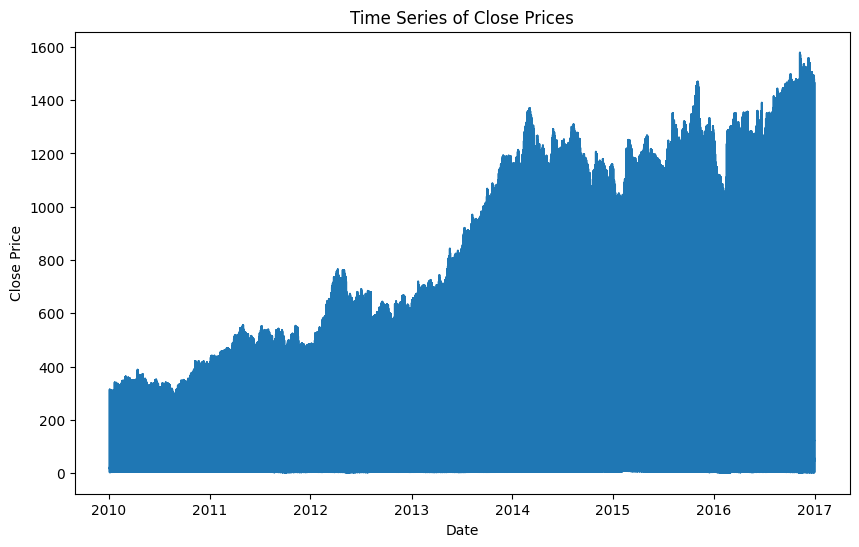

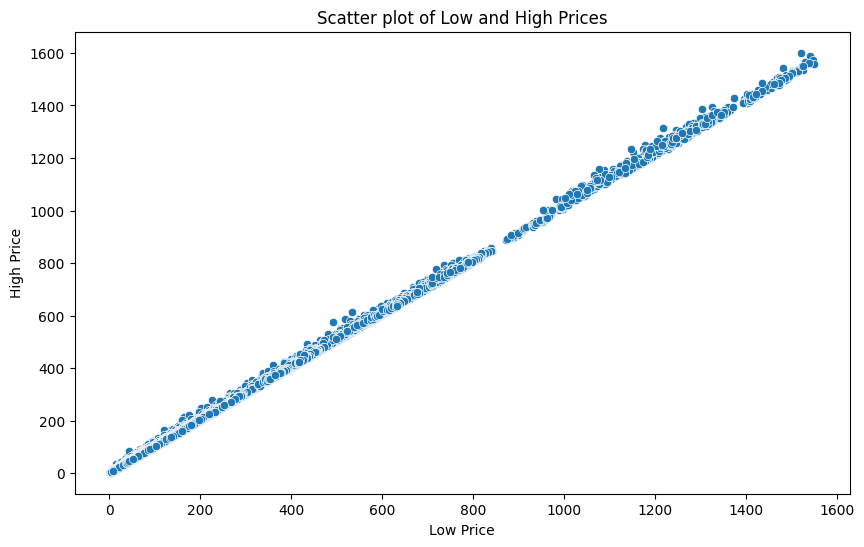

In [100]:
data_prices['date'] = pd.to_datetime(data_prices['date'], errors='coerce')

print(data_prices[data_prices['date'].isnull()])

data_prices.dropna(subset=['date'], inplace=True)

data_prices['date'] = pd.to_datetime(data_prices['date'])

plt.figure(figsize=(10, 6))
plt.plot(data_prices['date'], data_prices['close'])
plt.title('Time Series of Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='low', y='high', data=data_prices)
plt.title('Scatter plot of Low and High Prices')
plt.xlabel('Low Price')
plt.ylabel('High Price')
plt.show()



Establish a Deep Neural network Architecture by using PyTorch library to handle the
regression task



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define your deep neural network architecture
class DeepNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(DeepNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

input_size = 5
hidden_size1 = 32
hidden_size2 = 64
output_size = 1
learning_rate = 0.001
optimizer_class = optim.Adam

model = DeepNeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

X_train = np.random.rand(100, input_size).astype(np.float32)
y_train = np.random.rand(100, output_size).astype(np.float32)
X_test = np.random.rand(50, input_size).astype(np.float32)
y_test = np.random.rand(50, output_size).astype(np.float32)

X_train_tensor = torch.from_numpy(X_train)
y_train_tensor = torch.from_numpy(y_train)
X_test_tensor = torch.from_numpy(X_test)
y_test_tensor = torch.from_numpy(y_test)

num_epochs = 1000
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

mae = torch.mean(torch.abs(outputs - y_train_tensor))

print(f'Final Loss: {loss.item():.4f}')
print(f'Final MAE: {mae.item():.4f}')

Epoch [100/1000], Loss: 0.0230
Epoch [200/1000], Loss: 0.0071
Epoch [300/1000], Loss: 0.0045
Epoch [400/1000], Loss: 0.0029
Epoch [500/1000], Loss: 0.0009
Epoch [600/1000], Loss: 0.0002
Epoch [700/1000], Loss: 0.0003
Epoch [800/1000], Loss: 0.0001
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000
Final Loss: 0.0000, Final MAE: 0.0041


By using GridSearch tool from sklearn library chose the best hyper-parameters (learning rate ,
optimizers, epoch, model architecture, etc) that will give an efficient model.

In [ ]:
from itertools import product


input_size = 5
output_size = 1


learning_rates = [0.001, 0.01, 0.1]
optimizers = [optim.SGD, optim.Adam]
hidden_sizes = [(32, 16), (64, 32), (128, 64)]

best_model = None
best_loss = float('inf')

for lr, optimizer_class, (hidden_size1, hidden_size2) in product(learning_rates, optimizers, hidden_sizes):

    model = DeepNeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

    criterion = nn.MSELoss()
    optimizer = optimizer_class(model.parameters(), lr=lr)

    num_epochs = 1000
    for epoch in range(num_epochs):

        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    if loss < best_loss:
        best_loss = loss
        best_model = model
        best_lr = lr
        best_optimizer = optimizer_class
        best_hidden_size1 = hidden_size1
        best_hidden_size2 = hidden_size2

print("Best hyperparameters:")
print(f"Learning Rate: {best_lr}")
print(f"Optimizer: {best_optimizer}")
print(f"Hidden Size 1: {best_hidden_size1}")
print(f"Hidden Size 2: {best_hidden_size2}")


Epoch [100/1000], Loss: 0.3873
Epoch [200/1000], Loss: 0.2135
Epoch [300/1000], Loss: 0.1402
Epoch [400/1000], Loss: 0.1124
Epoch [500/1000], Loss: 0.1028
Epoch [600/1000], Loss: 0.0996
Epoch [700/1000], Loss: 0.0986
Epoch [800/1000], Loss: 0.0982
Epoch [900/1000], Loss: 0.0980
Epoch [1000/1000], Loss: 0.0978
Epoch [100/1000], Loss: 0.1889
Epoch [200/1000], Loss: 0.1402
Epoch [300/1000], Loss: 0.1153
Epoch [400/1000], Loss: 0.1028
Epoch [500/1000], Loss: 0.0968
Epoch [600/1000], Loss: 0.0939
Epoch [700/1000], Loss: 0.0926
Epoch [800/1000], Loss: 0.0919
Epoch [900/1000], Loss: 0.0916
Epoch [1000/1000], Loss: 0.0914
Epoch [100/1000], Loss: 0.1406
Epoch [200/1000], Loss: 0.1041
Epoch [300/1000], Loss: 0.0974
Epoch [400/1000], Loss: 0.0960
Epoch [500/1000], Loss: 0.0955
Epoch [600/1000], Loss: 0.0952
Epoch [700/1000], Loss: 0.0950
Epoch [800/1000], Loss: 0.0948
Epoch [900/1000], Loss: 0.0945
Epoch [1000/1000], Loss: 0.0943
Epoch [100/1000], Loss: 0.1146
Epoch [200/1000], Loss: 0.1006
Epoch

Visualize the two graph (Loss / Epochs) and (Accuracy / Epochs) for both training and test
data, give your interpretation.

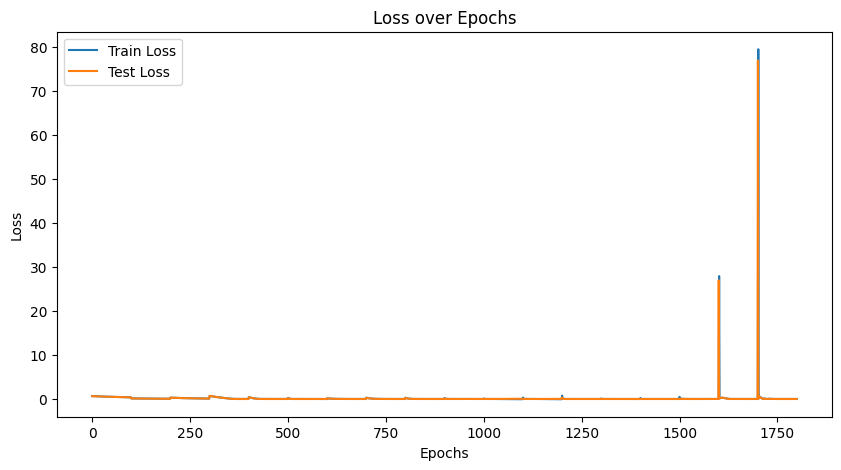

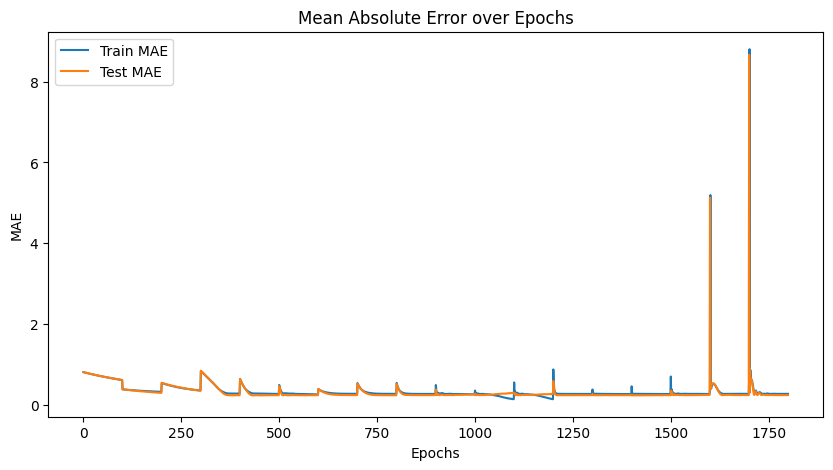

In [ ]:
import matplotlib.pyplot as plt


train_losses = []
test_losses = []
train_maes = []
test_maes = []

for lr, optimizer_class, (hidden_size1, hidden_size2) in product(learning_rates, optimizers, hidden_sizes):

    model = DeepNeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

    criterion = nn.MSELoss()
    optimizer = optimizer_class(model.parameters(), lr=lr)

    num_epochs = 100
    for epoch in range(num_epochs):

        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)

        mae = torch.mean(torch.abs(outputs - y_train_tensor))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            test_outputs = model(X_test_tensor)
            test_loss = criterion(test_outputs, y_test_tensor)
            test_mae = torch.mean(torch.abs(test_outputs - y_test_tensor))

        train_losses.append(loss.item())
        test_losses.append(test_loss.item())
        train_maes.append(mae.item())
        test_maes.append(test_mae.item())

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_maes, label='Train MAE')
plt.plot(test_maes, label='Test MAE')
plt.title('Mean Absolute Error over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [ ]:
class RegularizedDeepNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, dropout_rate=0.5, l1_reg=0.01, l2_reg=0.01):
        super(RegularizedDeepNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.dropout = nn.Dropout(dropout_rate)
        self.l1_reg = l1_reg
        self.l2_reg = l2_reg

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.dropout(out)
        out = self.fc3(out)
        return out


model = RegularizedDeepNeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)
criterion = nn.MSELoss()
optimizer = optimizer_class(model.parameters(), lr=learning_rate)

num_epochs = 1000
for epoch in range(num_epochs):

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Apply L1 regularization
    l1_regularization = torch.tensor(0.)
    for param in model.parameters():
        l1_regularization += torch.norm(param, 1)
    loss += model.l1_reg * l1_regularization

    # Apply L2 regularization
    l2_regularization = torch.tensor(0.)
    for param in model.parameters():
        l2_regularization += torch.norm(param, 2)
    loss += model.l2_reg * l2_regularization

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

with torch.no_grad():

    X_test = np.random.rand(50, input_size).astype(np.float32)
    y_test = np.random.rand(50, output_size).astype(np.float32)
    X_test_tensor = torch.from_numpy(X_test)
    y_test_tensor = torch.from_numpy(y_test)

    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)
    test_mae = torch.mean(torch.abs(test_outputs - y_test_tensor))

print(f'Test Loss: {test_loss.item():.4f}')
print(f'Test MAE: {test_mae.item():.4f}')


Epoch [100/1000], Loss: 0.2211
Epoch [200/1000], Loss: 0.2230
Epoch [300/1000], Loss: 0.2216
Epoch [400/1000], Loss: 0.2218
Epoch [500/1000], Loss: 0.2232
Epoch [600/1000], Loss: 0.2219
Epoch [700/1000], Loss: 0.2213
Epoch [800/1000], Loss: 0.2233
Epoch [900/1000], Loss: 0.2215
Epoch [1000/1000], Loss: 0.2209
Test Loss: 0.0905
Test MAE: 0.2622


In [ ]:
# Part 2

In [ ]:
data = pd.read_csv('predictive_maintenance.csv')
print(data.head())


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  


In [ ]:
## Preprocessing
data.describe()
data.isnull().sum()
data.drop_duplicates(keep=False,inplace=True)

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data['Product ID']= label_encoder.fit_transform(data['Product ID'])
data['Type']= label_encoder.fit_transform(data['Type'])
data['Failure Type']= label_encoder.fit_transform(data['Failure Type'])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data["Rotational speed [rpm]"]= scaler.fit_transform(data["Rotational speed [rpm]"].values.reshape(-1,1))
data["Air temperature [K]"]= scaler.fit_transform(data["Air temperature [K]"].values.reshape(-1,1))
data["Process temperature [K]"]= scaler.fit_transform(data["Process temperature [K]"].values.reshape(-1,1))
data["Torque [Nm]"]= scaler.fit_transform(data["Torque [Nm]"].values.reshape(-1,1))
data["Tool wear [min]"]= scaler.fit_transform(data["Tool wear [min]"].values.reshape(-1,1))



In [ ]:
data.describe()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
count,10000.00000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,4999.50000,1.19940,0.511405,0.531551,0.215818,0.497073,0.426684,0.033900,1.039000
std,2886.89568,2886.89568,0.60023,0.217419,0.183177,0.104356,0.136936,0.251597,0.180981,0.379069
min,1.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,2499.75000,1.00000,0.326087,0.382716,0.148428,0.403846,0.209486,0.000000,1.000000
50%,5000.50000,4999.50000,1.00000,0.521739,0.543210,0.194994,0.498626,0.426877,0.000000,1.000000
75%,7500.25000,7499.25000,2.00000,0.673913,0.666667,0.258440,0.590659,0.640316,0.000000,1.000000
max,10000.00000,9999.00000,2.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [101]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,7003,2,0.304348,0.358025,0.222934,0.535714,0.000000,0,1
1,2,1003,1,0.315217,0.370370,0.139697,0.583791,0.011858,0,1
2,3,1004,1,0.304348,0.345679,0.192084,0.626374,0.019763,0,1
3,4,1005,1,0.315217,0.358025,0.154249,0.490385,0.027668,0,1
4,5,1006,1,0.315217,0.370370,0.139697,0.497253,0.035573,0,1
...,...,...,...,...,...,...,...,...,...,...
9995,9996,9997,2,0.380435,0.333333,0.253783,0.353022,0.055336,0,1
9996,9997,1001,0,0.391304,0.333333,0.270081,0.384615,0.067194,0,1
9997,9998,9998,2,0.402174,0.358025,0.277648,0.406593,0.086957,0,1
9998,9999,1002,0,0.402174,0.370370,0.139697,0.614011,0.098814,0,1


In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Failure and not failure cases
custom_palette = {0: 'green', 1: 'red'}

The dataset is imbalance, where the number of failure cases exceeds that of non-failure cases.

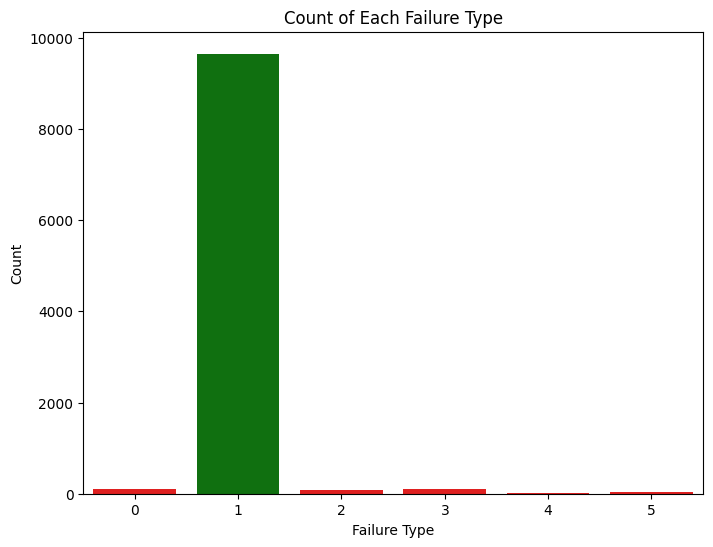

In [ ]:
# Define a custom color palette
custom_palette = {1: 'green', 0: 'red' ,  2: 'red', 3: 'red', 4: 'red', 5: 'red'}  # Success (type 1) is green, failure is red

# Plot the count of each failure type
plt.figure(figsize=(8, 6))
sns.countplot(x='Failure Type', hue='Failure Type', data=data, palette=custom_palette, legend=False)
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.title('Count of Each Failure Type')
plt.show()

Data augmentation

In [102]:
from imblearn.over_sampling import SMOTE
# Separate features and target variable
X = data.drop(columns=['Failure Type'])
y = data['Failure Type']

# Instantiate SMOTE
smote = SMOTE()

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)


In [104]:
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['Failure Type'] = y_resampled

resampled_data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,7003,2,0.304348,0.358025,0.222934,0.535714,0.000000,0,1
1,2,1003,1,0.315217,0.370370,0.139697,0.583791,0.011858,0,1
2,3,1004,1,0.304348,0.345679,0.192084,0.626374,0.019763,0,1
3,4,1005,1,0.315217,0.358025,0.154249,0.490385,0.027668,0,1
4,5,1006,1,0.315217,0.370370,0.139697,0.497253,0.035573,0,1
...,...,...,...,...,...,...,...,...,...,...
57907,4548,3739,1,0.821641,0.634681,0.171738,0.494006,0.837585,1,5
57908,7028,5228,1,0.648983,0.689659,0.176192,0.529779,0.830620,1,5
57909,518,1307,1,0.353680,0.379868,0.162398,0.499895,0.836728,1,5
57910,1160,427,0,0.194439,0.274095,0.209778,0.444041,0.823729,1,5


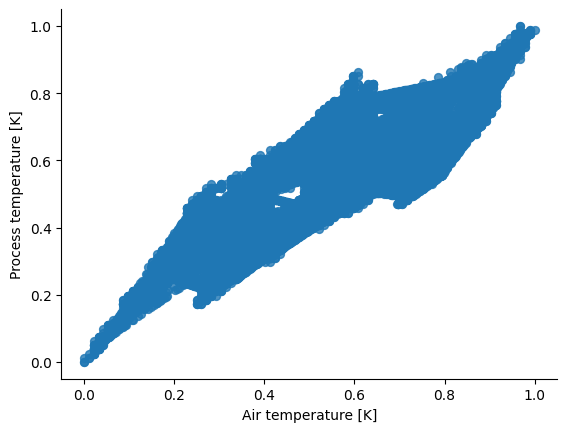

In [116]:
# @title Air temperature [K] vs Process temperature [K]

from matplotlib import pyplot as plt
resampled_data.plot(kind='scatter', x='Air temperature [K]', y='Process temperature [K]', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Establish a Deep Neural network Architecture by using PyTorch library to handle the multi
class classification task.

In [105]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

X = resampled_data.drop(columns=['UDI', 'Failure Type']).values
y = resampled_data['Failure Type'].values

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

dataset = TensorDataset(X_tensor, y_tensor)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out

input_size = X.shape[1]
hidden_size = 64
num_classes = len(resampled_data['Failure Type'].unique())
model = MLP(input_size, hidden_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

num_epochs = 10
train_accuracy_list = []
test_accuracy_list = []
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

    model.eval()
    correct_train = 0
    total_train = 0
    with torch.no_grad():
        for inputs, labels in train_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
    train_accuracy = correct_train / total_train
    train_accuracy_list.append(train_accuracy)

    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    test_accuracy = correct_test / total_test
    test_accuracy_list.append(test_accuracy)

    print(f'Accuracy on test set for epoch {epoch+1}: {(test_accuracy) * 100:.2f}%')

Epoch [1/10], Loss: 1.8330656290054321
Accuracy on test set for epoch 1: 17.18%
Epoch [2/10], Loss: 1.850609540939331
Accuracy on test set for epoch 2: 16.71%
Epoch [3/10], Loss: 1.9207850694656372
Accuracy on test set for epoch 3: 16.71%
Epoch [4/10], Loss: 1.8681533336639404
Accuracy on test set for epoch 4: 16.71%
Epoch [5/10], Loss: 1.780434012413025
Accuracy on test set for epoch 5: 16.71%
Epoch [6/10], Loss: 1.8681533336639404
Accuracy on test set for epoch 6: 16.71%
Epoch [7/10], Loss: 1.8856972455978394
Accuracy on test set for epoch 7: 16.71%
Epoch [8/10], Loss: 1.8681533336639404
Accuracy on test set for epoch 8: 16.71%
Epoch [9/10], Loss: 1.9207849502563477
Accuracy on test set for epoch 9: 16.71%
Epoch [10/10], Loss: 1.9032410383224487
Accuracy on test set for epoch 10: 16.71%


5. By using GridSearch tool from sklearn library chose the best hyper-parameters (learning rate ,
optimizers, epoch, model architecture, etc) that will give an efficient model.

In [108]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

X = resampled_data.drop(columns=['UDI', 'Failure Type']).values
y = resampled_data['Failure Type'].values

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

dataset = TensorDataset(X_tensor, y_tensor)

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out

def get_data_loaders(train_size, batch_size):
    train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, len(dataset) - train_size])
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, test_loader

hidden_sizes = [32]
learning_rates = [0.001,0.01]
num_epochs = [5,10]
batch_sizes = [32]

best_accuracy = 0.0
best_parameters = {}

for hidden_size in hidden_sizes:
    for lr in learning_rates:
        for epoch in num_epochs:
            for batch_size in batch_sizes:
                model = MLP(input_size=X.shape[1], hidden_size=hidden_size, num_classes=len(np.unique(y)))
                criterion = nn.CrossEntropyLoss()
                optimizer = torch.optim.Adam(model.parameters(), lr=lr)
                train_loader, test_loader = get_data_loaders(train_size=int(0.8 * len(dataset)), batch_size=batch_size)

                for _ in range(epoch):
                    model.train()
                    for inputs, labels in train_loader:
                        optimizer.zero_grad()
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                        loss.backward()
                        optimizer.step()

                model.eval()
                correct = 0
                total = 0
                with torch.no_grad():
                    for inputs, labels in test_loader:
                        outputs = model(inputs)
                        _, predicted = torch.max(outputs.data, 1)
                        total += labels.size(0)
                        correct += (predicted == labels).sum().item()

                accuracy = correct / total
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_parameters = {
                        'hidden_size': hidden_size,
                        'lr': lr,
                        'num_epochs': epoch,
                        'batch_size': batch_size
                    }

print("Best Hyperparameters:", best_parameters)
print("Best Accuracy:", best_accuracy * 100, "%")


Best Hyperparameters: {'hidden_size': 32, 'lr': 0.01, 'num_epochs': 5, 'batch_size': 32}
Best Accuracy: 16.748683415350083 %


Visualize the two graph (Loss / Epochs) and (Accuracy / Epochs) for both training and test
data, give your interpretation.

In [117]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracy_list, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.grid(True)
plt.show()

TypeError: can only concatenate list (not "int") to list

<Figure size 1000x500 with 0 Axes>

Calculate metrics like accuracy, sensitivity, f1 score, etc, on both training and test dataset.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train = train_dataset[:][0]
y_train = train_dataset[:][1]
X_test = test_dataset[:][0]
y_test = test_dataset[:][1]

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

model.eval()
y_train_pred = []
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_train_pred.extend(predicted.tolist())

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")

y_test_pred = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_test_pred.extend(predicted.tolist())

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Metrics:
Accuracy: 0.1663
Precision: 0.0277
Recall: 0.1663
F1 Score: 0.0474

Test Metrics:
Accuracy: 0.1681
Precision: 0.0283
Recall: 0.1681
F1 Score: 0.0484


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Apply several regularization techniques on your architecture then compare the obtained result
with the first model.

In [ ]:
class RegularizedMLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, dropout_prob=0.5):
        super(RegularizedMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)
        self.batch_norm = nn.BatchNorm1d(hidden_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.batch_norm(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out


regularized_model = RegularizedMLP(input_size, hidden_size, num_classes)

optimizer = torch.optim.Adam(regularized_model.parameters(), lr=0.01, weight_decay=1e-5)

num_epochs = 10
for epoch in range(num_epochs):
    regularized_model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = regularized_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

regularized_model.eval()
with torch.no_grad():
    y_test_pred_regularized = []
    y_test_true = []

    for inputs, labels in test_loader:
        outputs = regularized_model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_test_pred_regularized.extend(predicted.tolist())
        y_test_true.extend(labels.tolist())


test_accuracy_regularized = accuracy_score(y_test_true, y_test_pred_regularized)
print(f'Test Accuracy (Regularized Model): {test_accuracy_regularized:.4f}')



Epoch [1/10], Loss: 1.774920105934143
Epoch [2/10], Loss: 1.7658333778381348
Epoch [3/10], Loss: 1.7554997205734253
Epoch [4/10], Loss: 1.6906390190124512
Epoch [5/10], Loss: 1.6896497011184692
Epoch [6/10], Loss: 1.7166728973388672
Epoch [7/10], Loss: 1.6467701196670532
Epoch [8/10], Loss: 1.6521129608154297
Epoch [9/10], Loss: 1.5725173950195312
Epoch [10/10], Loss: 1.5609585046768188
Test Accuracy (Regularized Model): 0.4323
